In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("dataset/all_data_info.csv", encoding='UTF-8')

train_df.isnull().sum()

artist              0
date            26363
genre            1254
pixelsx             0
pixelsy             0
size_bytes          0
source            167
style             986
title             122
artist_group        0
in_train            0
new_filename        0
dtype: int64

# Limpeza dos Dados
Foram retiradas as células vazias, mesmo o número parecendo grande a base de dados contém mais de 100 mil amostras, por isso não comprometerá as previsões. Também foi retirada a coluna 'new_filename' que possuia códigos dos quadros entretanto estes foram apagados da base, logo também foi excluida.

In [3]:
train_df.drop(['in_train'], axis=1, inplace = True)
train_df.drop(['artist_group'], axis=1, inplace = True)
train_df.drop(['new_filename'], axis=1, inplace = True)
train_df=train_df[pd.to_numeric(train_df['date'], errors='coerce').notnull()]
train_df.dropna(inplace = True)

In [4]:
train_df.isnull().sum()

artist        0
date          0
genre         0
pixelsx       0
pixelsy       0
size_bytes    0
source        0
style         0
title         0
dtype: int64

# Separação dos Dados
A seguir foram mostrados os diversos estilos que a base contém. Entretanto, foram separados apenas para previsão posterior dos autores do impressionismo.

In [5]:
print(train_df['style'].unique())

['Color Field Painting' 'Ukiyo-e' 'Surrealism' 'Romanticism' 'Cloisonnism'
 'Northern Renaissance' 'Abstract Art' 'Realism' 'Biedermeier' 'Baroque'
 'Cubism' 'Mannerism (Late Renaissance)' 'Rococo' 'High Renaissance'
 'Fauvism' 'Symbolism' 'Early Renaissance' 'Classicism' 'Pointillism'
 'Post-Impressionism' 'Art Nouveau (Modern)' 'Impressionism' 'Japonism'
 'Neoclassicism' 'Expressionism' 'Contemporary Realism' 'Suprematism'
 'Tachisme' 'Ink and wash painting' 'Magic Realism' 'Luminism'
 'Academicism' 'Naïve Art (Primitivism)' 'Op Art' 'Neo-Romanticism'
 'Constructivism' 'Dada' 'Neo-Expressionism' 'Neoplasticism'
 'Abstract Expressionism' 'Lyrical Abstraction' 'Byzantine' 'Muralism'
 'Art Informel' 'Tenebrism' 'Analytical\xa0Realism' 'Concretism'
 'Art Brut' 'Pop Art' 'Neo-Rococo' 'Orientalism' 'Regionalism' 'Futurism'
 'Orphism' 'American Realism' 'Intimism' 'Synthetic Cubism'
 'Metaphysical art' 'Socialist Realism' 'Miserablism' 'Shin-hanga'
 'Social Realism' 'Post-Painterly Abstract

# Seleção dos Dados
Foram separados apenas os quadros pertencentes ao impressionismo.

In [6]:
train_df = train_df.loc[train_df["style"] == "Impressionism"]

train_df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title
96,Gustave Caillebotte,1881,genre painting,5164.0,4087.0,3587461.0,wikiart,Impressionism,Rising Road
132,Theo van Rysselberghe,1905,nude painting (nu),3642.0,5124.0,11270882.0,wikiart,Impressionism,Seated nude
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape)
216,Claude Monet,1883,landscape,4540.0,3611.0,4873803.0,wikiart,Impressionism,"The Manneport, Rock Arch West of Etretat"
279,Pierre-Auguste Renoir,1917,sketch and study,4476.0,3396.0,8423735.0,wikiart,Impressionism,Sitting Girl
...,...,...,...,...,...,...,...,...,...
102967,Andre Dunoyer de Segonzac,1935.0,landscape,337.0,453.0,62344.0,wikiart,Impressionism,Le Morin pres de Guerard
103040,Gregoire Boonzaier,1964.0,landscape,450.0,338.0,117887.0,wikiart,Impressionism,Landscape with trees and houses
103063,Piet Mondrian,1907.0,still life,400.0,380.0,34095.0,wikiart,Impressionism,Nature died with Sunflower
103129,Hans am Ende,1900.0,sketch and study,315.0,480.0,32341.0,wikipedia,Impressionism,Maedchen auf der wiese


# Transformação de colunas textuais em numéricas
A base possui muitas colunas textuais, referentes a autores, obras, estilo. Todas foram transformadas, para melhor serem analisadas.

In [7]:
print(train_df['artist'].unique())

['Gustave Caillebotte' 'Theo van Rysselberghe' 'Edgar Degas'
 'Claude Monet' 'Pierre-Auguste Renoir' 'Ferdinand Hodler'
 'Valentin Serov' 'Alfred Sisley' 'Paul Signac' 'Berthe Morisot'
 'Childe Hassam' 'Eugene Boudin' 'Paul Cezanne' 'Anders Zorn'
 'Max Slevogt' 'Henri de Toulouse-Lautrec' 'Honore Daumier'
 'Camille Pissarro' 'At Les Ambassadeurs' 'Robert Julian Onderdonk'
 'Max Liebermann' 'Cornelis Vreedenburgh' 'Edouard Manet'
 'John Henry Twachtman' 'Giovanni Boldini' 'Southwest Texas'
 'Mary Cassatt' 'Giuseppe de Nittis' 'Georg Pauli' 'Niccolo Cannicci'
 'John Lavery' 'Frederic Bazille' 'Francisco Oller' 'Raoul Dufy'
 'Federico Zandomeneghi' 'Andres de Santa Maria' 'Edmund Charles Tarbell'
 'James McNeill Whistler' 'John Singer Sargent' 'James Tissot'
 'Felix Vallotton ' 'Konstantin Yuon' 'Oleksandr Bogomazov'
 'Frits Thaulow' 'Pablo Picasso' 'Henri-Edmond Cross' 'Edvard Munch'
 'Umberto Boccioni' 'Thomas Eakins' 'Snowstorm' 'Henri Matisse'
 'Maurice Prendergast' 'William Merritt C

In [8]:
train_df["artist"] = train_df["artist"].astype('category')

In [9]:
train_df["artist_cat"] = train_df["artist"].cat.codes

train_df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_cat
96,Gustave Caillebotte,1881,genre painting,5164.0,4087.0,3587461.0,wikiart,Impressionism,Rising Road,101
132,Theo van Rysselberghe,1905,nude painting (nu),3642.0,5124.0,11270882.0,wikiart,Impressionism,Seated nude,253
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),51
216,Claude Monet,1883,landscape,4540.0,3611.0,4873803.0,wikiart,Impressionism,"The Manneport, Rock Arch West of Etretat",45
279,Pierre-Auguste Renoir,1917,sketch and study,4476.0,3396.0,8423735.0,wikiart,Impressionism,Sitting Girl,221
...,...,...,...,...,...,...,...,...,...,...
102967,Andre Dunoyer de Segonzac,1935.0,landscape,337.0,453.0,62344.0,wikiart,Impressionism,Le Morin pres de Guerard,13
103040,Gregoire Boonzaier,1964.0,landscape,450.0,338.0,117887.0,wikiart,Impressionism,Landscape with trees and houses,100
103063,Piet Mondrian,1907.0,still life,400.0,380.0,34095.0,wikiart,Impressionism,Nature died with Sunflower,222
103129,Hans am Ende,1900.0,sketch and study,315.0,480.0,32341.0,wikipedia,Impressionism,Maedchen auf der wiese,104


In [10]:
print(train_df['title'].unique())

['Rising Road' 'Seated nude' 'Interior (The Rape)' ...
 'Nature died with Sunflower' 'Maedchen auf der wiese' 'Miragem, Nápoles']


In [11]:
train_df["title"] = train_df["title"].astype('category')

In [12]:
train_df["title_cat"] = train_df["title"].cat.codes

train_df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_cat,title_cat
96,Gustave Caillebotte,1881,genre painting,5164.0,4087.0,3587461.0,wikiart,Impressionism,Rising Road,101,3829
132,Theo van Rysselberghe,1905,nude painting (nu),3642.0,5124.0,11270882.0,wikiart,Impressionism,Seated nude,253,4044
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),51,2106
216,Claude Monet,1883,landscape,4540.0,3611.0,4873803.0,wikiart,Impressionism,"The Manneport, Rock Arch West of Etretat",45,5064
279,Pierre-Auguste Renoir,1917,sketch and study,4476.0,3396.0,8423735.0,wikiart,Impressionism,Sitting Girl,221,4161
...,...,...,...,...,...,...,...,...,...,...,...
102967,Andre Dunoyer de Segonzac,1935.0,landscape,337.0,453.0,62344.0,wikiart,Impressionism,Le Morin pres de Guerard,13,2420
103040,Gregoire Boonzaier,1964.0,landscape,450.0,338.0,117887.0,wikiart,Impressionism,Landscape with trees and houses,100,2363
103063,Piet Mondrian,1907.0,still life,400.0,380.0,34095.0,wikiart,Impressionism,Nature died with Sunflower,222,2882
103129,Hans am Ende,1900.0,sketch and study,315.0,480.0,32341.0,wikipedia,Impressionism,Maedchen auf der wiese,104,2566


In [13]:
print(train_df['genre'].unique())

['genre painting' 'nude painting (nu)' 'interior' 'landscape'
 'sketch and study' 'portrait' 'cityscape' 'flower painting'
 'symbolic painting' 'self-portrait' 'marina' 'still life'
 'history painting' 'allegorical painting' 'literary painting'
 'animal painting' 'religious painting' 'illustration'
 'mythological painting' 'pastorale' 'battle painting' 'caricature'
 'design' 'figurative' 'cloudscape' 'panorama' 'poster'
 'wildlife painting']


In [14]:
train_df["genre"] = train_df["genre"].astype('category')

In [15]:
train_df["genre_cat"] = train_df["genre"].cat.codes

train_df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_cat,title_cat,genre_cat
96,Gustave Caillebotte,1881,genre painting,5164.0,4087.0,3587461.0,wikiart,Impressionism,Rising Road,101,3829,9
132,Theo van Rysselberghe,1905,nude painting (nu),3642.0,5124.0,11270882.0,wikiart,Impressionism,Seated nude,253,4044,17
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),51,2106,12
216,Claude Monet,1883,landscape,4540.0,3611.0,4873803.0,wikiart,Impressionism,"The Manneport, Rock Arch West of Etretat",45,5064,13
279,Pierre-Auguste Renoir,1917,sketch and study,4476.0,3396.0,8423735.0,wikiart,Impressionism,Sitting Girl,221,4161,24
...,...,...,...,...,...,...,...,...,...,...,...,...
102967,Andre Dunoyer de Segonzac,1935.0,landscape,337.0,453.0,62344.0,wikiart,Impressionism,Le Morin pres de Guerard,13,2420,13
103040,Gregoire Boonzaier,1964.0,landscape,450.0,338.0,117887.0,wikiart,Impressionism,Landscape with trees and houses,100,2363,13
103063,Piet Mondrian,1907.0,still life,400.0,380.0,34095.0,wikiart,Impressionism,Nature died with Sunflower,222,2882,25
103129,Hans am Ende,1900.0,sketch and study,315.0,480.0,32341.0,wikipedia,Impressionism,Maedchen auf der wiese,104,2566,24


In [16]:
print(train_df['source'].unique())

['wikiart' 'wikipedia']


In [17]:
train_df["source"] = train_df["source"].astype('category')

In [18]:
train_df["source_cat"] = train_df["source"].cat.codes

train_df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_cat,title_cat,genre_cat,source_cat
96,Gustave Caillebotte,1881,genre painting,5164.0,4087.0,3587461.0,wikiart,Impressionism,Rising Road,101,3829,9,0
132,Theo van Rysselberghe,1905,nude painting (nu),3642.0,5124.0,11270882.0,wikiart,Impressionism,Seated nude,253,4044,17,0
147,Edgar Degas,1869,interior,5382.0,3349.0,1824204.0,wikiart,Impressionism,Interior (The Rape),51,2106,12,0
216,Claude Monet,1883,landscape,4540.0,3611.0,4873803.0,wikiart,Impressionism,"The Manneport, Rock Arch West of Etretat",45,5064,13,0
279,Pierre-Auguste Renoir,1917,sketch and study,4476.0,3396.0,8423735.0,wikiart,Impressionism,Sitting Girl,221,4161,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102967,Andre Dunoyer de Segonzac,1935.0,landscape,337.0,453.0,62344.0,wikiart,Impressionism,Le Morin pres de Guerard,13,2420,13,0
103040,Gregoire Boonzaier,1964.0,landscape,450.0,338.0,117887.0,wikiart,Impressionism,Landscape with trees and houses,100,2363,13,0
103063,Piet Mondrian,1907.0,still life,400.0,380.0,34095.0,wikiart,Impressionism,Nature died with Sunflower,222,2882,25,0
103129,Hans am Ende,1900.0,sketch and study,315.0,480.0,32341.0,wikipedia,Impressionism,Maedchen auf der wiese,104,2566,24,1


# Analisando os Dados

45     470
44     447
9      407
37     368
221    353
      ... 
250      1
246      1
238      1
234      1
287      1
Name: artist_cat, Length: 290, dtype: int64


<AxesSubplot:ylabel='Frequency'>

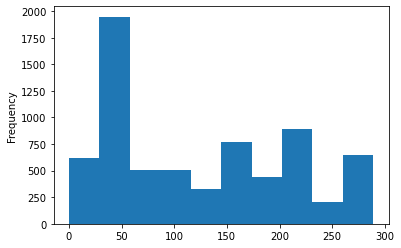

In [19]:
print(train_df['artist_cat'].value_counts())
train_df['artist_cat'].plot(kind='hist')

13    2450
9     1612
20     966
4      830
15     241
8      158
25     141
17     125
23      86
24      76
1       47
12      45
22      22
5       13
2       10
10      10
14       8
16       7
7        5
19       5
0        3
6        2
26       2
11       2
21       1
18       1
3        1
27       1
Name: genre_cat, dtype: int64


<AxesSubplot:ylabel='Frequency'>

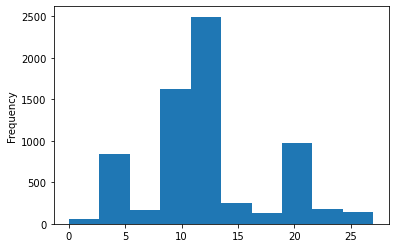

In [20]:
print(train_df['genre_cat'].value_counts())
train_df['genre_cat'].plot(kind='hist')

0    6489
1     381
Name: source_cat, dtype: int64


<AxesSubplot:ylabel='Frequency'>

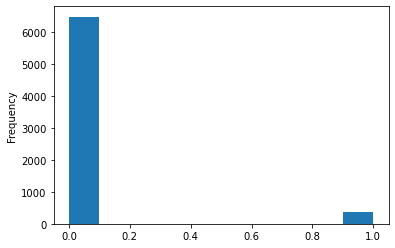

In [21]:
print(train_df['source_cat'].value_counts())
train_df['source_cat'].plot(kind='hist')

5977    41
2286    27
4061    20
5823    12
4054    11
        ..
469      1
4567     1
2524     1
477      1
0        1
Name: title_cat, Length: 6322, dtype: int64


<AxesSubplot:ylabel='Frequency'>

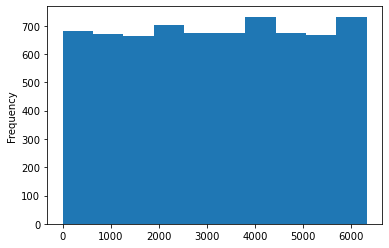

In [22]:
print(train_df['title_cat'].value_counts())
train_df['title_cat'].plot(kind='hist')

In [23]:
print(train_df['date'].unique())
#train_df['date'].plot(kind='hist')

['1881' '1905' '1869' '1883' '1917' '1882' '1885' '1887.0' '1922' '1884'
 '1873' '1889' '1875' '1888' '1887' '1900' '1894' '1874' '1877' '1871'
 '1886' '1879' '1878' '1893' '1914.0' '1898' '1895' '1906' '1890' '1919'
 '1865' '1880' '1876' '1867' '1910.0' '1897' '1872' '1892' '1896' '1891'
 '1858' '1932' '1907.0' '1866' '1868' '1909.0' '1912' '1912.0' '1902'
 '1884.0' '1913.0' '1906.0' '1924' '1855' '1900.0' '1870' '1860' '1861'
 '1908' '1903' '1904' '1917.0' '1910' '1911' '1928.0' '1903.0' '1888.0'
 '1864' '1899' '1907' '1862' '1918' '1923' '1898.0' '1885.0' '1925.0'
 '1925' '1901' '1916' '1914' '1913' '1915' '1899.0' '1909' '1880.0' '1863'
 '1904.0' '1886.0' '1905.0' '1908.0' '1940.0' '1856' '1939' '1920'
 '1979.0' '1922.0' '1911.0' '1926.0' '1920.0' '1891.0' '1883.0' '1923.0'
 '1881.0' '1892.0' '1896.0' '1937.0' '1921.0' '1929.0' '1938.0' '1893.0'
 '1870.0' '1866.0' '1879.0' '1901.0' '1897.0' '1890.0' '1894.0' '1889.0'
 '1895.0' '1915.0' '1921' '1877.0' '1902.0' '1916.0' '1930' '1875

1280.0    513
1000.0    434
800.0     230
1024.0    151
900.0     137
         ... 
1403.0      1
3600.0      1
1297.0      1
1467.0      1
4480.0      1
Name: pixelsx, Length: 1376, dtype: int64


<AxesSubplot:ylabel='Frequency'>

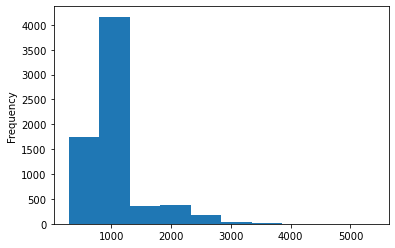

In [24]:
print(train_df['pixelsx'].value_counts())
train_df['pixelsx'].plot(kind='hist')

1024.0    483
1000.0    273
1200.0    143
800.0     106
1280.0     86
         ... 
1561.0      1
2473.0      1
2831.0      1
1261.0      1
2794.0      1
Name: pixelsy, Length: 1527, dtype: int64


<AxesSubplot:ylabel='Frequency'>

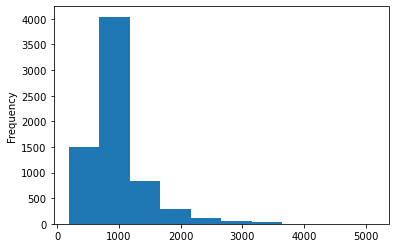

In [25]:
print(train_df['pixelsy'].value_counts())
train_df['pixelsy'].plot(kind='hist')

262744.0     2
45925.0      2
230162.0     2
250668.0     2
1900411.0    2
            ..
1594882.0    1
170690.0     1
237037.0     1
1725981.0    1
36864.0      1
Name: size_bytes, Length: 6827, dtype: int64


<AxesSubplot:ylabel='Frequency'>

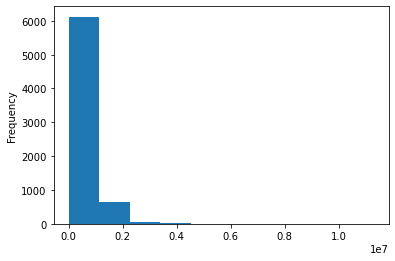

In [26]:
print(train_df['size_bytes'].value_counts())
train_df['size_bytes'].plot(kind='hist')

# Verificando presença de Outliers

<AxesSubplot:title={'center':'genre_cat'}>

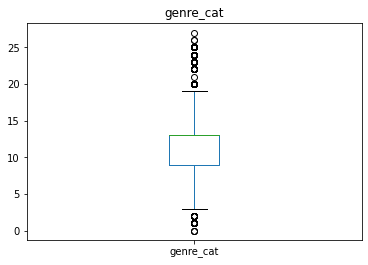

In [27]:
train_df['genre_cat'].plot(kind='box', title='genre_cat')

<AxesSubplot:title={'center':'title_cat'}>

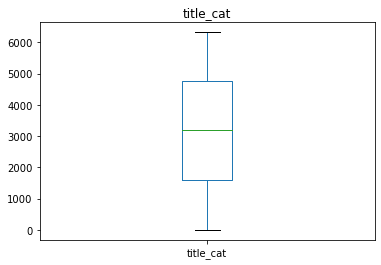

In [28]:
train_df['title_cat'].plot(kind='box', title='title_cat')

<AxesSubplot:title={'center':'source_cat'}>

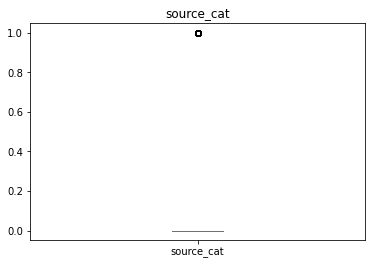

In [29]:
train_df['source_cat'].plot(kind='box', title='source_cat')

<AxesSubplot:title={'center':'pixelsx'}>

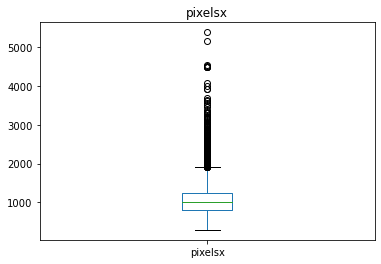

In [30]:
train_df['pixelsx'].plot(kind='box', title='pixelsx')

<AxesSubplot:title={'center':'pixelsy'}>

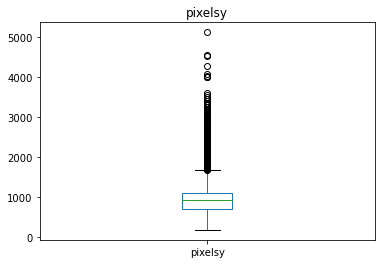

In [31]:
train_df['pixelsy'].plot(kind='box', title='pixelsy')

<AxesSubplot:title={'center':'size_bytes'}>

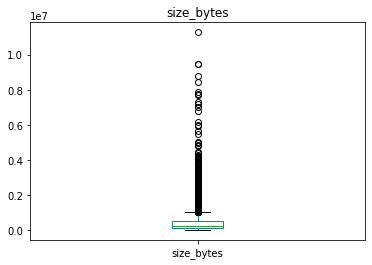

In [32]:
train_df['size_bytes'].plot(kind='box', title='size_bytes')

# Matriz de Correlação

In [33]:
correlation_col = ['genre_cat','title_cat','source_cat', 'pixelsx', 'pixelsy', 'date', 'size_bytes']
df = pd.DataFrame(train_df[correlation_col])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,genre_cat,title_cat,source_cat,pixelsx,pixelsy,size_bytes
genre_cat,1.000000,-0.006268,-0.001215,-0.119108,0.024510,-0.077301
title_cat,-0.006268,1.000000,-0.003235,0.052321,0.057658,0.021798
source_cat,-0.001215,-0.003235,1.000000,-0.015143,-0.012347,-0.018931
pixelsx,-0.119108,0.052321,-0.015143,1.000000,0.755994,0.575408
pixelsy,0.024510,0.057658,-0.012347,0.755994,1.000000,0.569589
size_bytes,-0.077301,0.021798,-0.018931,0.575408,0.569589,1.000000


# Novo Dataframe com os dados numéricos para o Agrupamento 

In [34]:
numeric_df = train_df[['genre_cat','title_cat','source_cat', 'pixelsx', 'pixelsy', 'date', 'size_bytes']]

# Normalização dos Dados

In [35]:
norm_df = preprocessing.Normalizer().fit_transform(numeric_df)

# K-means

In [ ]:
iters = [1, 10, 100]
k_values = [10, 20, 50, 100, 200]

print("BRUTE DATA:\n") 

for k in k_values:
    print("K =", k)
    for i in iters:
        kmeans_model = KMeans(n_clusters = k, max_iter=i, random_state=0)
        kmeans_model.fit_predict(numeric_df)

        labels = kmeans_model.labels_
        print("{i} - silhouette with max_iter:".format(i=i), metrics.silhouette_score(numeric_df, labels, metric='euclidean'))

    print("#################################################")

print("\nNORMALIZED DATA:\n")    

for k in k_values:
    print("K =", k)
    for i in iters:
        kmeans_model = KMeans(n_clusters = k, max_iter=i, random_state=0)
        kmeans_model.fit_predict(norm_df)

        labels = kmeans_model.labels_
        print("{i} - silhouette with max_iter:".format(i=i), metrics.silhouette_score(norm_df, labels, metric='euclidean'))

    print("##################################################")

BRUTE DATA:

K = 10
1 - silhouette with max_iter: 0.5583889712606037
10 - silhouette with max_iter: 0.5609240789857171
100 - silhouette with max_iter: 0.5561605047083132
#################################################
K = 20
1 - silhouette with max_iter: 0.524753540397219
10 - silhouette with max_iter: 0.5229490842658576
100 - silhouette with max_iter: 0.530157599050386
#################################################
K = 50
1 - silhouette with max_iter: 0.5084418561162266
10 - silhouette with max_iter: 0.5172700311708869
100 - silhouette with max_iter: 0.5175503588944776
#################################################
K = 100
1 - silhouette with max_iter: 0.4856543390624968
10 - silhouette with max_iter: 0.49268308868678606
100 - silhouette with max_iter: 0.49268308868678606
#################################################
K = 200
1 - silhouette with max_iter: 0.4161672443330375
10 - silhouette with max_iter: 0.42518159678392925
100 - silhouette with max_iter: 0.4251815967839292